In [8]:
from clustering import (
    get_demand_daily,
    get_supply,
    Data_one_year,
    get_demand_monthly,
    mergeall,
    Cluster_data,
)
import os
import matplotlib.pyplot as plt

In [2]:
# 2015
demand_df = get_demand_daily()
filepath_pv = os.path.join(
    os.path.abspath(""), "data", "supply_data_formatted", "PV", "PV_baalbeck_2015.csv"
)
pv_df = get_supply(filepath_pv)
filepath_wind = os.path.join(
    os.path.abspath(""), "data", "supply_data_formatted", "Wind", "Wind_Akkar_2015.csv"
)
wind_df = get_supply(filepath_wind)
# wind_df.rename(columns={"electricity": "wind"},inplace=True)

data_2015 = Data_one_year(demand_df, wind_df, pv_df, demand_df["demand"].max())

data_2015.write_main_df()

In [3]:
# 2016
filepath_demand = os.path.join(
    os.path.abspath(""), "data", "demand_data_formatted", "Average-Demand-2016.xlsx"
)
demand_df = get_demand_monthly(filepath_demand)

filepath_pv = os.path.join(
    os.path.abspath(""), "data", "supply_data_formatted", "PV", "PV_baalbeck_2016.csv"
)
filepath_wind = os.path.join(
    os.path.abspath(""), "data", "supply_data_formatted", "Wind", "Wind_Akkar_2016.csv"
)
pv_df = get_supply(filepath_pv)

wind_df = get_supply(filepath_wind)

data_2016 = Data_one_year(demand_df, wind_df, pv_df, demand_df["demand"].max())
data_2016.write_main_df()

In [4]:
# 2017

filepath_demand = os.path.join(
    os.path.abspath(""), "data", "demand_data_formatted", "Average-Demand-2017.xlsx"
)
demand_df = get_demand_monthly(filepath_demand)

filepath_pv = os.path.join(
    os.path.abspath(""), "data", "supply_data_formatted", "PV", "PV_baalbeck_2017.csv"
)
filepath_wind = os.path.join(
    os.path.abspath(""), "data", "supply_data_formatted", "Wind", "Wind_Akkar_2017.csv"
)
pv_df = get_supply(filepath_pv)

wind_df = get_supply(filepath_wind)

data_2017 = Data_one_year(demand_df, wind_df, pv_df, demand_df["demand"].max())
data_2017.write_main_df()

In [5]:
# 2018
filepath_demand = os.path.join(
    os.path.abspath(""), "data", "demand_data_formatted", "Average-Demand-2018.xlsx"
)
demand_df = get_demand_monthly(filepath_demand)

filepath_pv = os.path.join(
    os.path.abspath(""), "data", "supply_data_formatted", "PV", "PV_baalbeck_2018.csv"
)
filepath_wind = os.path.join(
    os.path.abspath(""), "data", "supply_data_formatted", "Wind", "Wind_Akkar_2018.csv"
)
pv_df = get_supply(filepath_pv)

wind_df = get_supply(filepath_wind)

data_2018 = Data_one_year(demand_df, wind_df, pv_df, demand_df["demand"].max())
data_2018.write_main_df()

In [6]:
# %%
# all dataframes
all_data_df = mergeall(
    data_2015.cluster_input,
    data_2016.cluster_input,
    data_2017.cluster_input,
    data_2018.cluster_input,
)

In [10]:
inertia_list = []
for n in range(1, 10):
    inertia_list.append(Cluster_data(all_data_df, n).inertia)

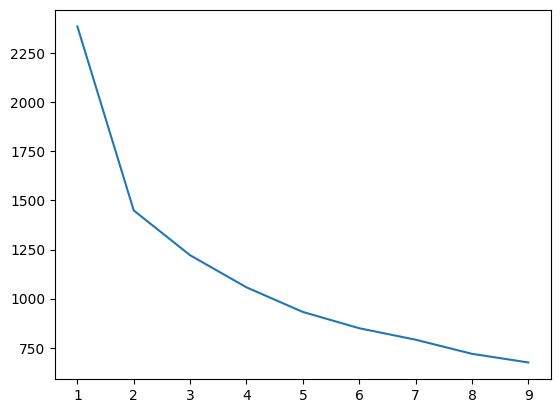

In [12]:
plt.plot(range(1, 10), inertia_list)
plt.savefig("inertia.png")
plt.show()